In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [54]:
data_train_path = 'train'
data_test_path = 'test'

In [55]:
img_width=180
img_height=180

In [56]:
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path, shuffle=True,image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 557 files belonging to 2 classes.


In [57]:
data_train.class_names

['cats', 'dogs']

In [58]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path, shuffle=True,image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 143 files belonging to 2 classes.


In [59]:
from tensorflow.keras.models import Sequential

In [60]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [61]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout (0.2),
    layers.Dense (128),
    layers.Dense(len(data_train.class_names))
])

In [62]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [63]:
history = model.fit(data_train, epochs = 25)

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.4907 - loss: 1.8810
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.5873 - loss: 0.6650
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.6740 - loss: 0.6156
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.6955 - loss: 0.5882
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.7481 - loss: 0.5122
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.7654 - loss: 0.4721
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.8023 - loss: 0.4151
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8856 - loss: 0.3595
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.8579 - loss: 0.3118
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8971 - loss: 0.2507
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.9352 - loss: 0.1860
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step

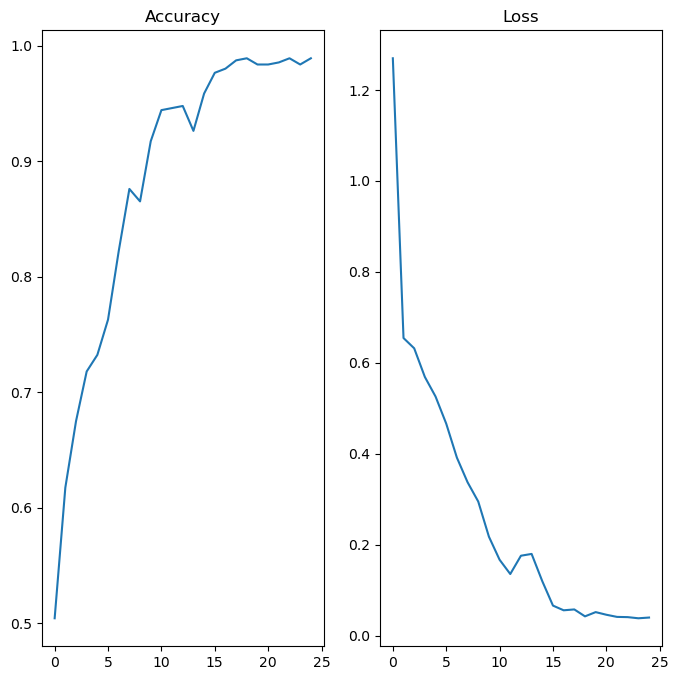

In [64]:
epochs_range = range(25)
plt.figure(figsize=(8,8))
plt.subplot (1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy');
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss');
plt.title('Loss');

In [65]:
loss,acc = model.evaluate(data_train)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 1.0000 - loss: 0.0157
The accuracy of the model for training data is: 100.0
The Loss of the model for training data is: 0.011686902493238449


In [66]:
loss,acc = model.evaluate(data_test)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5931 - loss: 4.0313
The accuracy of the model for testing data is: 61.538463830947876
The Loss of the model for testing data is: 3.326846122741699


In [67]:
image = 'test/dogs/dog_528.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat= tf.expand_dims (img_arr,0)

In [68]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [69]:
score = tf.nn.softmax(predict)

In [70]:
print(f'Provided image is of {data_train.class_names[np.argmax(score)]} with the accuracy of {np.max(score) *100:0.2f}%')

Provided image is of dogs with the accuracy of 99.91%


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

true_labels = []
for images, labels in data_test:
    true_labels.extend(labels.numpy())

predicted_labels = []
for images, _ in data_test:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


2024-06-01 17:28:14.929328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


2024-06-01 17:28:15.349423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [72]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.4755244755244755


In [73]:
precision = precision_score(true_labels, predicted_labels)
print("Precision:", precision)

Precision: 0.4861111111111111


In [74]:
recall = recall_score(true_labels, predicted_labels)
print("Recall:", recall)

Recall: 0.4794520547945205


In [75]:
f1 = f1_score(true_labels, predicted_labels)
print("F1-score:", f1)

F1-score: 0.4827586206896552


In [76]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[33 37]
 [38 35]]
